<a href="https://colab.research.google.com/github/LarsBentsen/CourseDSAIStatisticalLearning/blob/main/testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hello World 

In [29]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

## Load the California Housing Dataset

In [14]:
df = pd.read_csv('https://github.com/LarsBentsen/CourseDSAIStatisticalLearning/blob/main/data/California_Housing.txt?raw=true')
print("number of rows: ", df.shape[0])
df.head()

number of rows:  20640


,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [15]:
# rename columns to be consistent with the book
df.rename(columns={
    'population': 'Population',
    'housingMedianAge': 'HouseAge',
    'longitude': 'Longitude',
    'latitude': 'Latitude',
    'medianIncome': 'MedInc',
    'medianHouseValue': 'MedHouseVal'}, inplace=True)
df['MedHouseVal'] /= 100000

# calculate average values from total values
df['AveBedrms'] = df['totalBedrooms'] / df['households']
df['AveRooms'] = df['totalRooms'] / df['households']
df['AveOccup'] = df['Population'] / df['households']

# The response variable Y is the median house value in each
# neighborhood measured in units of $100,000.
target = 'MedHouseVal'

features = ['Population', 'AveBedrms', 'AveRooms', 'HouseAge',
            'Latitude', 'AveOccup', 'Longitude', 'MedInc']

### Before we start doing anything, remove 20% of the data for testing: 

In [22]:
# Set the seed (so that we all get the same results)
np.random.seed(666)
test_indxs = np.random.choice(np.arange(df.shape[0]), size=df.shape[0] // 5, replace=False)
df_test = df.iloc[test_indxs]
df = df.drop(test_indxs)

## Plot the correlation matrix to get a sense of the linear correlation between features

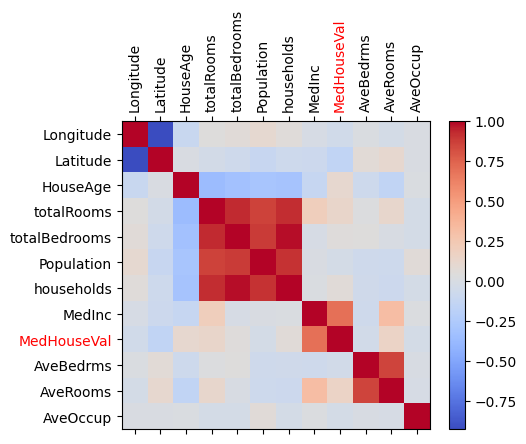

In [23]:
corr = df.corr()
# Plot the correlation matrix
fig, ax = plt.subplots(figsize=(5, 4))
cax = ax.matshow(corr, cmap='coolwarm')

# Add color bar
plt.colorbar(cax)

# Set ticks and labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))

ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)

# Customize the x-tick label for "MedHouseVal"
for label in ax.get_xticklabels():
    if label.get_text() == "MedHouseVal":
        label.set_color('red')

# Customize the y-tick label for "MedHouseVal"
for label in ax.get_yticklabels():
    if label.get_text() == "MedHouseVal":
        label.set_color('red')

# Show the plot
plt.show()

In [27]:
df.head()

,Longitude,Latitude,HouseAge,totalRooms,totalBedrooms,Population,households,MedInc,MedHouseVal,AveBedrms,AveRooms,AveOccup
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,4.526,1.023810,6.984127,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3.585,0.971880,6.238137,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3.521,1.073446,8.288136,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3.413,1.073059,5.817352,2.547945
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,2.697,1.103627,4.761658,2.139896


In [28]:
df.describe()

,Longitude,Latitude,HouseAge,totalRooms,totalBedrooms,Population,households,MedInc,MedHouseVal,AveBedrms,AveRooms,AveOccup
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.564426,35.623118,28.626756,2641.078064,539.310199,1430.307231,501.363614,3.877364,2.073128,1.097046,5.429016,3.067705
std,1.999263,2.132638,12.577788,2196.179012,424.394024,1155.073061,387.166948,1.916645,1.157003,0.497708,2.537821,10.911979
min,-124.350000,32.540000,1.000000,2.000000,1.000000,6.000000,1.000000,0.499900,0.149990,0.333333,0.846154,0.692308
25%,-121.780000,33.930000,18.000000,1450.000000,295.000000,786.000000,280.000000,2.562500,1.198000,1.006142,4.434739,2.429208
50%,-118.490000,34.250000,29.000000,2120.000000,435.000000,1166.500000,409.000000,3.531300,1.804000,1.048734,5.232849,2.819087
75%,-118.010000,37.710000,37.000000,3153.000000,648.000000,1728.250000,606.000000,4.759400,2.647000,1.099338,6.046828,3.278087
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,5.000010,34.066667,141.909091,1243.333333


<Figure size 500x500 with 0 Axes>

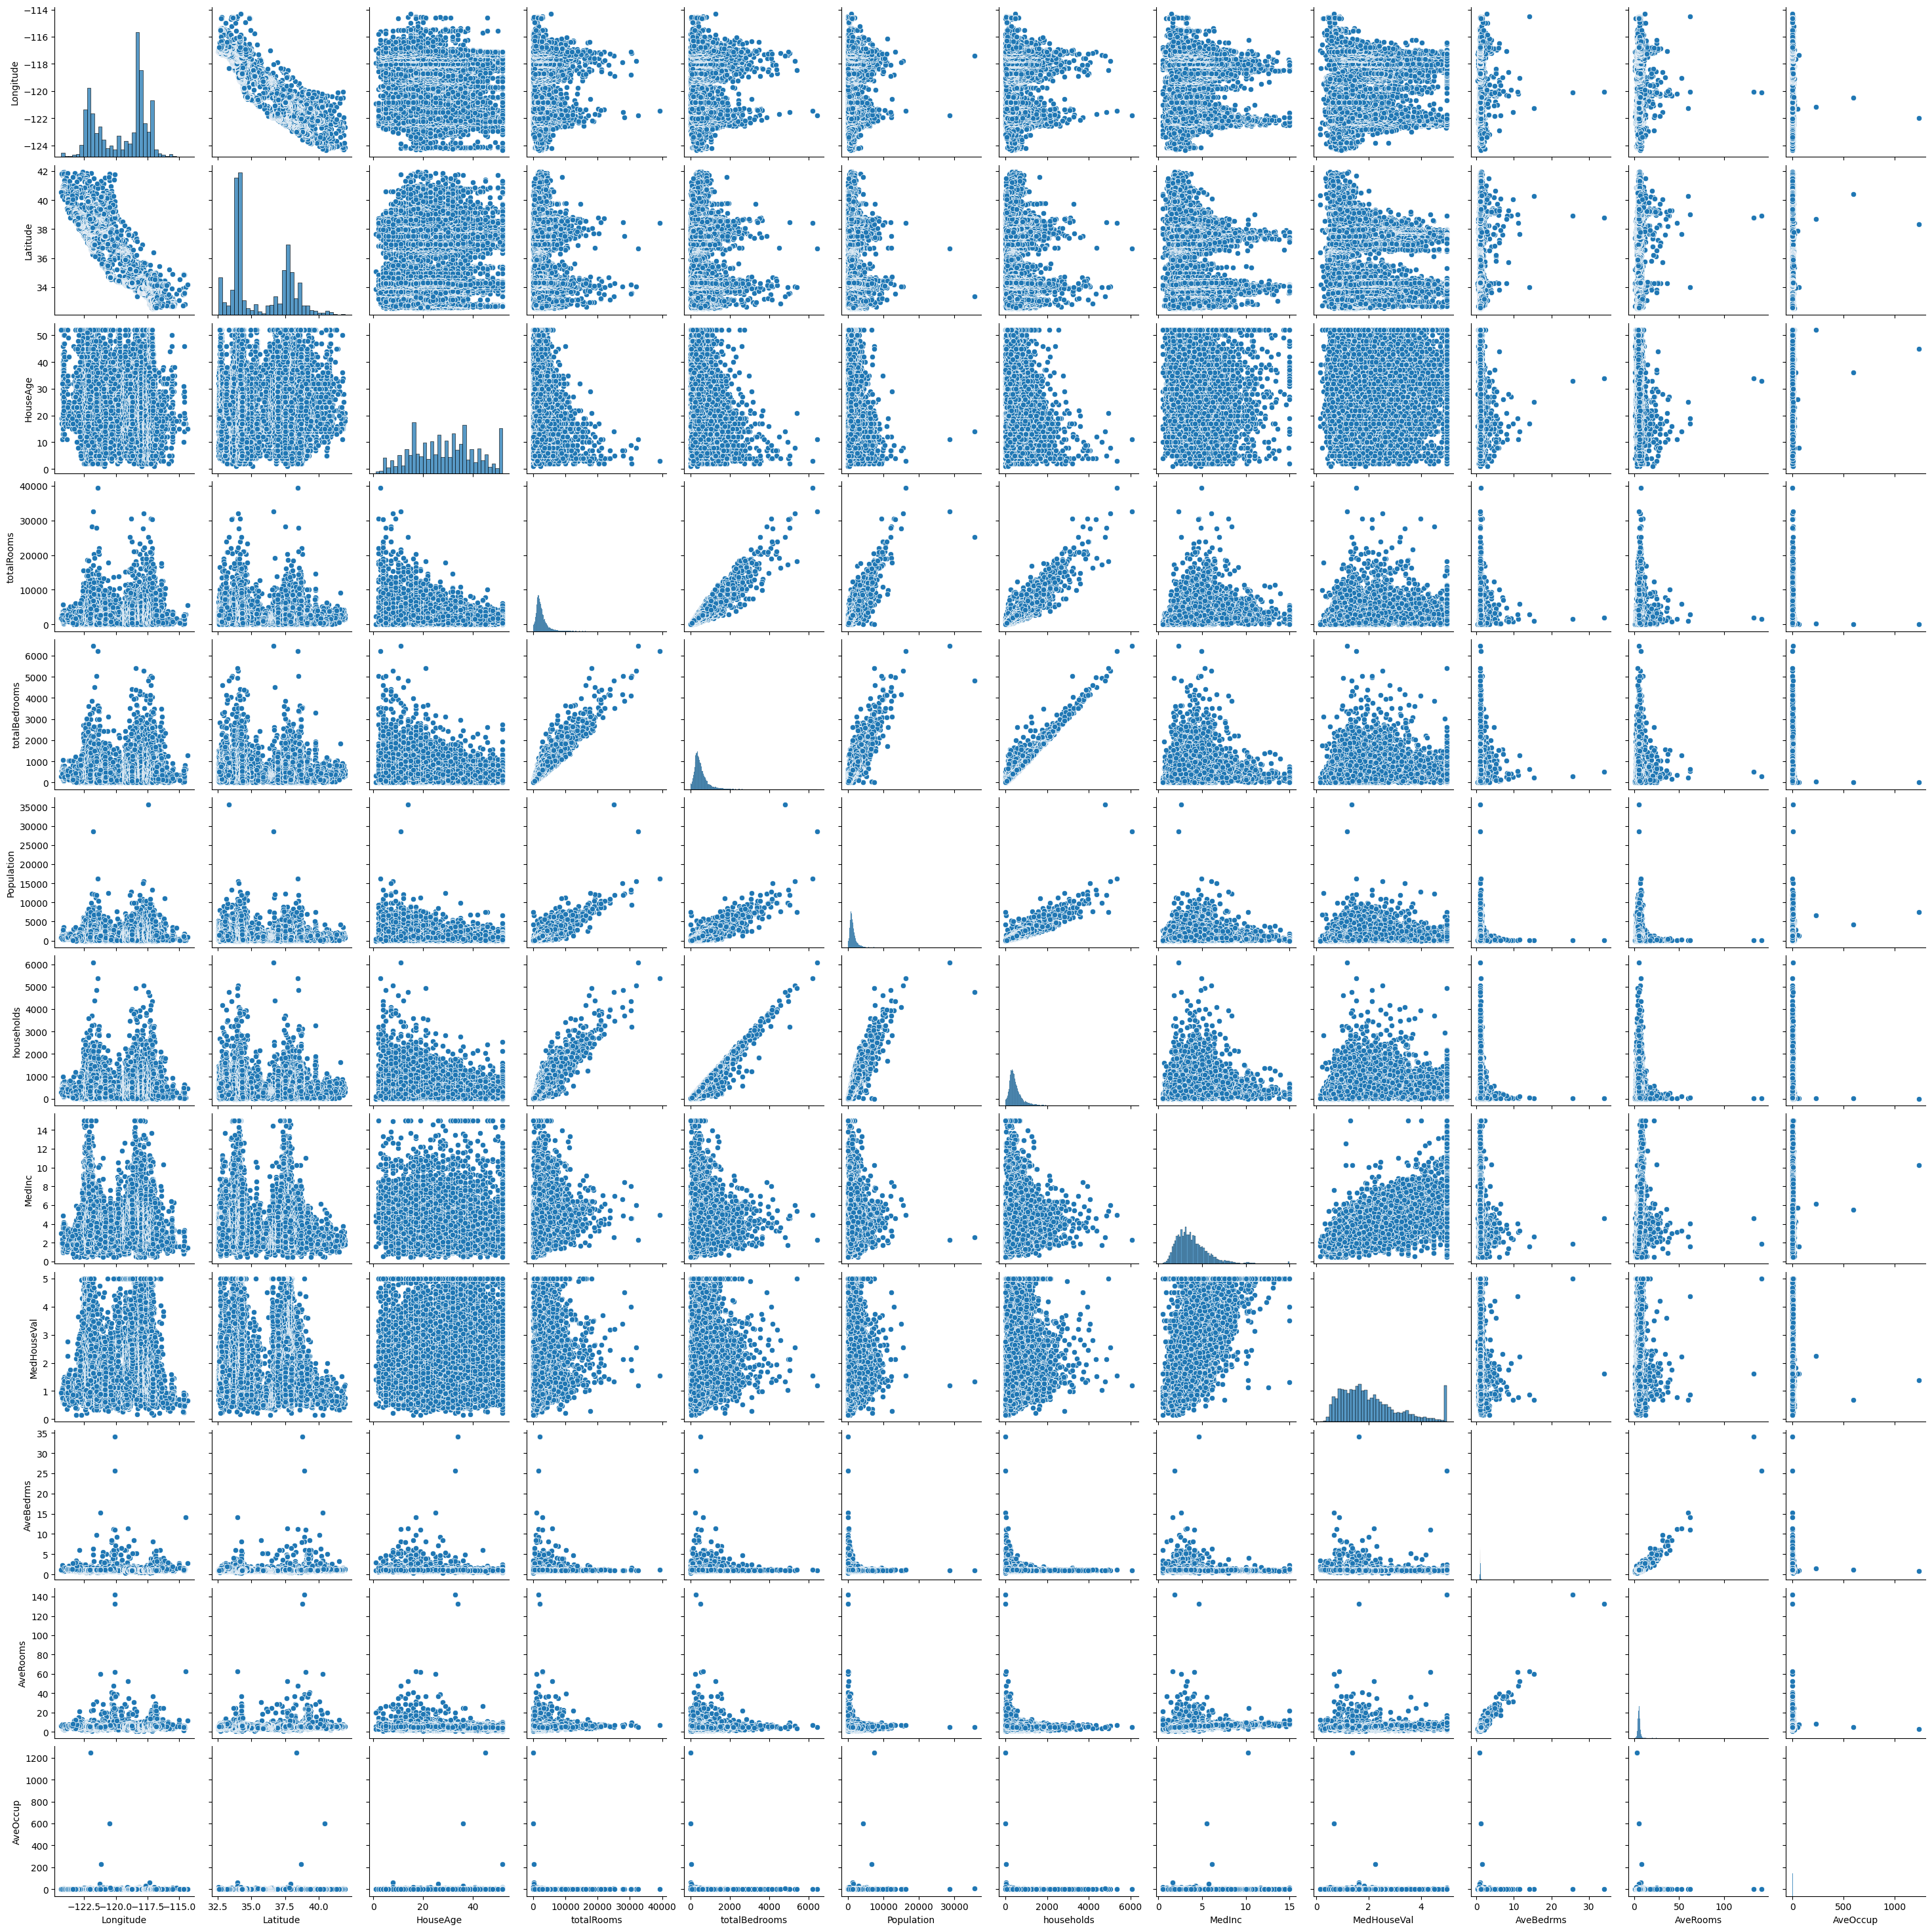

In [30]:
plt.figure(figsize=(5,5))
sns.pairplot(df)
plt.show()